<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-deep-learning/blob/main/CNN_CIFAR10_Classification_TestParameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [ ]:
print(f"Training data: \n{x_train[0][0]}")
print(f"\n\nLabels: \n{y_train[0]}")

Training data: 
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


Labels: 
[6]


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(f"Training data: \n{x_train[0][0]}")
print(f"\n\nLabels: \n{y_train[0]}")

Training data: 
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.53333333 0.42352941]
 [0.62352941

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(f"\n\nTrain Labels Shape: \n{y_train.shape}")
print(f"\n\nTrain Labels: \n{y_train[0]}")
print(f"\n\nTest Labels: \n{y_test[0]}")



Train Labels Shape: 
(50000, 10)


Train Labels: 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Test Labels: 
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential([
    Conv2D(input_shape=(32, 32, 3),filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),

    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.3343 - loss: 2.7715 - val_accuracy: 0.4859 - val_loss: 1.4589
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - accuracy: 0.5559 - loss: 1.3104 - val_accuracy: 0.5701 - val_loss: 1.2350
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6539 - loss: 1.0391 - val_accuracy: 0.6407 - val_loss: 1.0667
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.7110 - loss: 0.8697 - val_accuracy: 0.6907 - val_loss: 0.9234
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.7605 - loss: 0.7246 - val_accuracy: 0.7332 - val_loss: 0.8061
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8039 - loss: 0.5931 - val_accuracy: 0.7155 - val_loss: 0.8891
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8427 - loss: 0.4845 - val_accuracy: 0.6935 - val_loss: 0.9494
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8726 - loss: 0.3857 - 

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history['accuracy'])
print(history.history['loss'])
print(history.history['val_accuracy'])
print(history.history['val_loss'])

[0.41269999742507935, 0.5776200294494629, 0.6635199785232544, 0.7175999879837036, 0.7646999955177307, 0.8062199950218201, 0.8393999934196472, 0.8700199723243713, 0.8931599855422974, 0.9155600070953369]
[1.8545912504196167, 1.2486463785171509, 1.014555811882019, 0.8557204604148865, 0.714163601398468, 0.5900874137878418, 0.4937686622142792, 0.39719051122665405, 0.32931607961654663, 0.2622379958629608]
[0.48590001463890076, 0.5701000094413757, 0.6406999826431274, 0.6906999945640564, 0.7332000136375427, 0.715499997138977, 0.6934999823570251, 0.7355999946594238, 0.7522000074386597, 0.8008000254631042]
[1.458916425704956, 1.2349597215652466, 1.0666512250900269, 0.9233633875846863, 0.8061419725418091, 0.8891254663467407, 0.9493809342384338, 0.8197864294052124, 0.8392173051834106, 0.6729772686958313]


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.8008 - loss: 0.6730
Test Loss: 0.6729775667190552
Test Accuracy: 0.8008000254631042


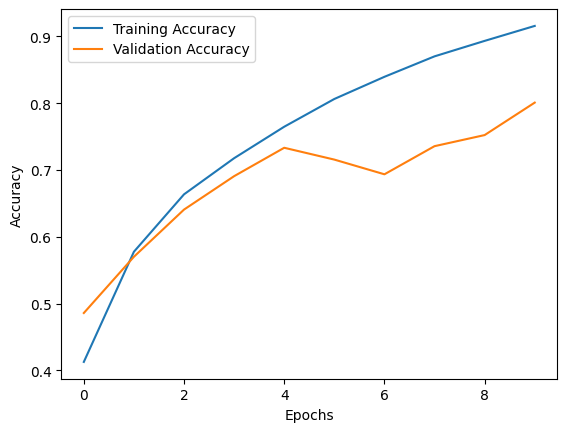

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
img_path = '/content/drive/MyDrive/images/example3.jpg'
img = image.load_img(img_path, target_size=(32, 32))

In [ ]:
img_array = image.img_to_array(img)
print(img_array.shape)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [ ]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
print(f"Predicted class index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class index: 2


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Predicted label: {class_names[predicted_class_index]}", )

Predicted label: bird
